In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score,make_scorer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
data=pd.read_csv(r'F:\Eye Disease\Features.csv')

In [5]:
data.head()

,HOG_feature_0,HOG_feature_1,HOG_feature_2,HOG_feature_3,HOG_feature_4,HOG_feature_5,HOG_feature_6,HOG_feature_7,HOG_feature_8,HOG_feature_9,...,HOG_feature_8183,HOG_feature_8184,HOG_feature_8185,HOG_feature_8186,HOG_feature_8187,HOG_feature_8188,HOG_feature_8189,HOG_feature_8190,HOG_feature_8191,Label
0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
1,0.577350,0.0,0.57735,0.0,0.577350,0.0,0.0,0.0,0.586302,0.0,...,0.0,0.707107,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0
2,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
3,0.707107,0.0,0.00000,0.0,0.707107,0.0,0.0,0.0,1.000000,0.0,...,0.0,0.707107,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0
4,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0


In [6]:
data.count()

HOG_feature_0       4217
HOG_feature_1       4217
HOG_feature_2       4217
HOG_feature_3       4217
HOG_feature_4       4217
                    ... 
HOG_feature_8188    4217
HOG_feature_8189    4217
HOG_feature_8190    4217
HOG_feature_8191    4217
Label               4217
Length: 8193, dtype: int64

In [7]:
X_start=data.drop(['Label'],axis=1).values
y=data['Label'].values

In [8]:
"""


pipeline_pca_umap_kmeans = Pipeline([
    ('pca', PCA()),
    ('umap', umap.UMAP()),
    ('kmeans', KMeans(n_clusters=4))  # Set the number of clusters to four
])


param_grid = {
    'pca__n_components': [500, 1000, 1500],
    'umap__n_neighbors': [5, 10, 20, 30],
    'umap__min_dist': [0.1, 0.5, 1.0],
    'umap__metric': ['euclidean', 'manhattan'],
    
}


ari_scorer = make_scorer(adjusted_rand_score)


grid_search = GridSearchCV(pipeline_pca_umap_kmeans, param_grid, cv=5, scoring=ari_scorer, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and corresponding ARI score
print("Best Parameters: ", grid_search.best_params_)
print("Best ARI Score: ", grid_search.best_score_)
Best Parameters:  {'pca__n_components': 1500, 'umap__metric': 'euclidean', 'umap__min_dist': 0.1, 'umap__n_neighbors': 30}"""

'\n\n\npipeline_pca_umap_kmeans = Pipeline([\n    (\'pca\', PCA()),\n    (\'umap\', umap.UMAP()),\n    (\'kmeans\', KMeans(n_clusters=4))  # Set the number of clusters to four\n])\n\n\nparam_grid = {\n    \'pca__n_components\': [500, 1000, 1500],\n    \'umap__n_neighbors\': [5, 10, 20, 30],\n    \'umap__min_dist\': [0.1, 0.5, 1.0],\n    \'umap__metric\': [\'euclidean\', \'manhattan\'],\n    \n}\n\n\nari_scorer = make_scorer(adjusted_rand_score)\n\n\ngrid_search = GridSearchCV(pipeline_pca_umap_kmeans, param_grid, cv=5, scoring=ari_scorer, n_jobs=-1)\n\n# Fit the grid search to the data\ngrid_search.fit(X, y)\n\n# Print the best parameters and corresponding ARI score\nprint("Best Parameters: ", grid_search.best_params_)\nprint("Best ARI Score: ", grid_search.best_score_)\nBest Parameters:  {\'pca__n_components\': 1500, \'umap__metric\': \'euclidean\', \'umap__min_dist\': 0.1, \'umap__n_neighbors\': 30}'

In [9]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_start)

In [10]:
pipeline_umap_pca = Pipeline([
    ('pca', PCA(n_components=0.95)),
    ('umap', umap.UMAP(n_neighbors=30, min_dist=0.1, metric='euclidean', n_components=2,random_state=42))
    
])

In [11]:
X = pipeline_umap_pca.fit_transform(X_scaled, y)

c:\Python310\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [12]:
X.shape

(4217, 2)

In [13]:
k_mean=KMeans(n_clusters=4,random_state=42)
k_mean.fit(X)

KMeans(n_clusters=4, random_state=42)

In [14]:
Labels=k_mean.predict(X)

In [15]:
score=silhouette_score(X,Labels)
print(score)

0.71476513


In [16]:
db_index = davies_bouldin_score(X, Labels)
db_index

0.43110050743057843

In [17]:
conf_matrix = confusion_matrix(y, Labels)

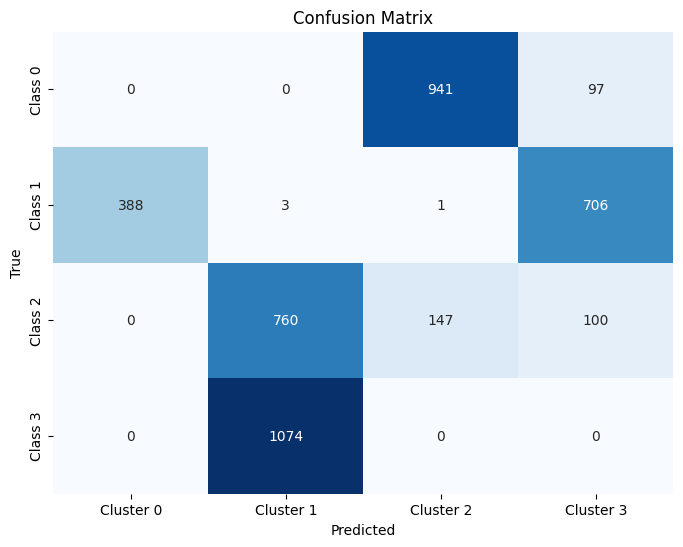

In [18]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Cluster 0', 'Cluster 1', 'Cluster 2','Cluster 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2','Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

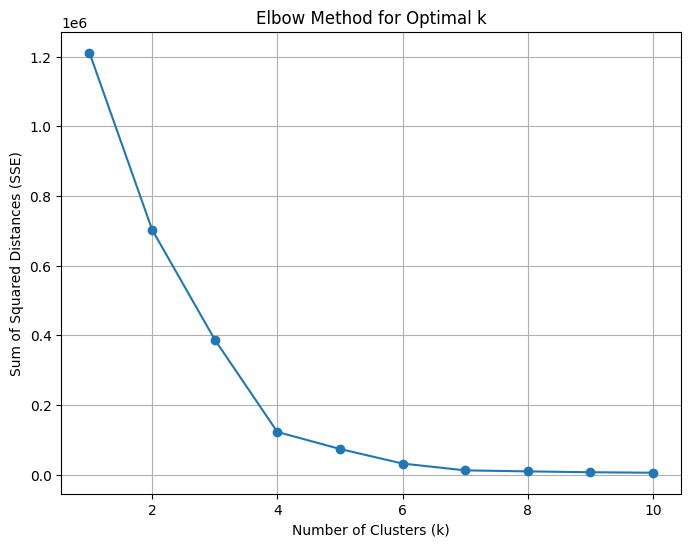

In [19]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.grid(True)
plt.show()

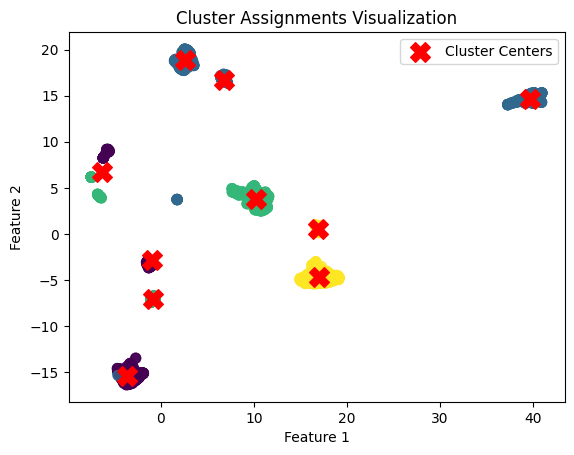

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)

# Scatter plot of cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.title('Cluster Assignments Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()